In [5]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from models.CNN import CNN
from models.ResNet18 import get_resnet18_for_cifar10
from utils.evaluate_uap_fanctions import *

# ==========================
# 前処理（ToTensorのみ＋別でnormalize関数を適用）
# ==========================

transform = transforms.ToTensor()

# ==========================
# テストデータ読み込み
# ==========================
test_dataset = datasets.CIFAR10(root="../data/cifar10", train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# ==========================
# デバイス設定
# ==========================
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")
    
device = get_device()
# ==========================
# モデル読み込み
# ==========================
cnn = CNN()
cnn.load_state_dict(torch.load("../models/pretrained/CNN_cifar10.pth"))
cnn = cnn.to(device)
cnn.eval()

# ==========================
# UAP読み込み
# ==========================
delta = torch.load("../attacks/uap/uap_delta_CNN_small.pt", map_location=device)



# ==========================
# 評価実行
# ==========================

acc_clean = evaluate_uap(cnn, test_loader, delta=None,device =device)
acc_adv = evaluate_uap(cnn, test_loader, delta=delta,device=device)

print(f"Accuracy on Original:    {acc_clean * 100:.2f}%")
print(f"Accuracy on Adversarial: {acc_adv * 100:.2f}%")


/var/folders/k3/b1t1gjg12pg0ycfdgpm2k7g00000gn/T/ipykernel_67442/155085516.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn.load_state_dict(torch.load("../models/pre

Accuracy on Original:    79.94%
Accuracy on Adversarial: 63.42%


In [8]:
resnet = get_resnet18_for_cifar10()
resnet.load_state_dict(torch.load("../models/pretrained/resnet18_cifar10.pth"))
resnet = resnet.to(device)
resnet.eval()

acc_clean = evaluate_uap(resnet,test_loader,device=device)
acc_adv = evaluate_uap(resnet, test_loader, delta,device=device)

print(f"Accuracy on Original:    {acc_clean * 100:.2f}%")
print(f"Accuracy on Adversarial: {acc_adv * 100:.2f}%")

/var/folders/k3/b1t1gjg12pg0ycfdgpm2k7g00000gn/T/ipykernel_67442/2602008234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load("../models/

Accuracy on Original:    88.09%
Accuracy on Adversarial: 61.83%


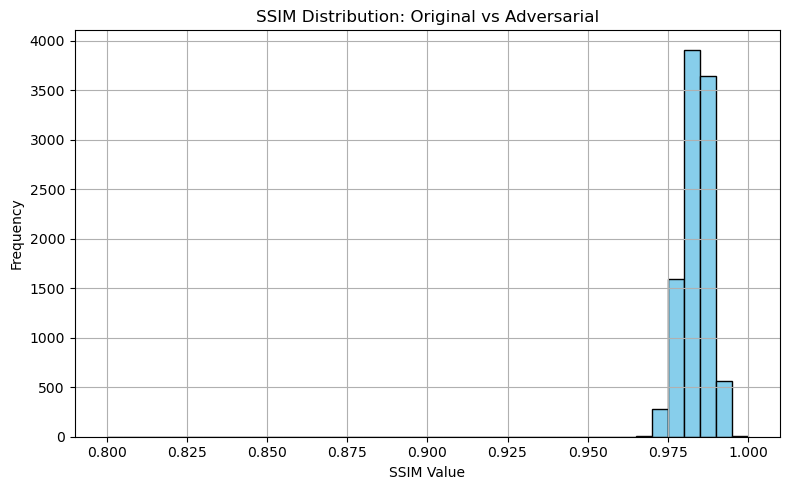

平均 SSIM: 0.9838，標準偏差: 0.0043


In [ ]:
plot_ssim_distribution(dataset=test_dataset ,delta=delta,device=device)

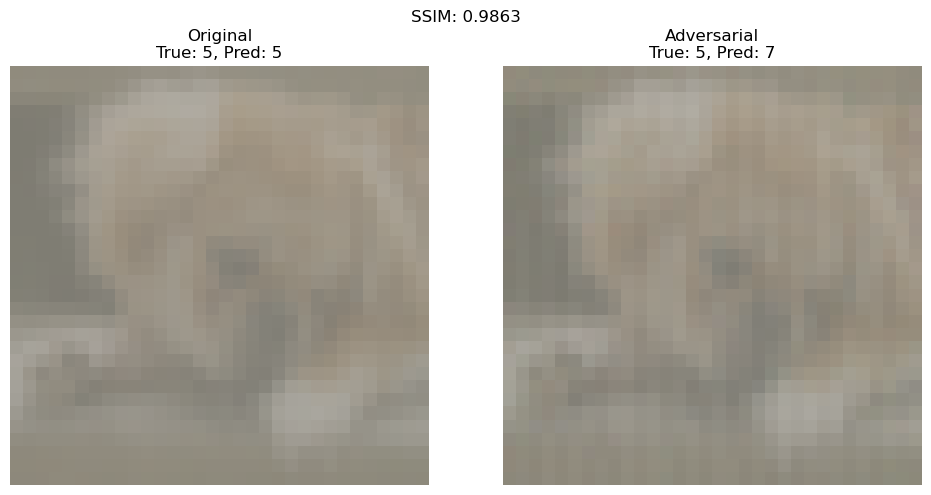

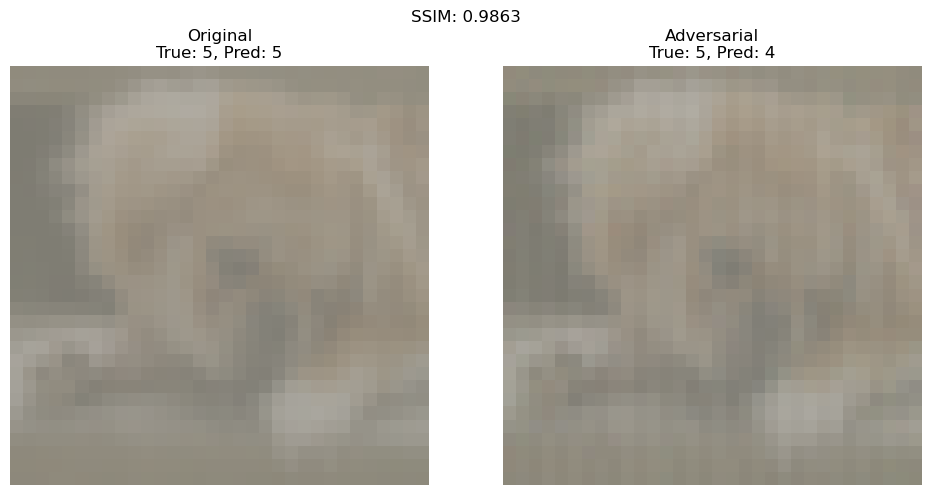

In [ ]:
index = 6823
visualize_uap_effect(cnn,delta,test_dataset,index=index,device=device)
visualize_uap_effect(resnet,delta,test_dataset,index=index,device=device)